** 스마트워치 센서 데이터 기반 행동 분류 2일차 **
# --------- 미션3 : 다양한 모델 사용하기 ---------

<span style="background-color:#fff5b1"><span style="color:black"><U>※ 미션완수 조건: SVM, KNN, Logistic Regression, GBM, XGBoost 알고리즘으로 모델링을 수행하고 예측 정확도를 도출하여 resualt 변수에 저장하고 가장 성능이 좋은 모델을 선정해 보세요.<U></span></span>

<span style="background-color:#fff5b1"><span style="color:red"><U>※ 함수/변수명, 데이터 타입 잘 확인하고 코드를 작성하세요 <U></span></span>

<span style="background-color:#fff5b1"><span style="color:red"><U>※ GBM 모델 학습시 시간이 오래 걸리므로 화장실 다녀오기에 좋습니다.(약 15분 소요) <U></span></span>

---

### (1) 데이터 불러오기

In [1]:
# pandas, numpy, matplotlib, seaborn, os 등 필요 라이브러리 호출
# 데이터를 나누기 위한 sklearn.model_selection 모듈의 train_test_split 함수 사용
# 모델 성능 평가 출력을 위해 sklearn.metrics 모듈의 모든 클래스 사용

import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
import os


from sklearn.model_selection import train_test_split
from sklearn.metrics import *
import warnings
warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

* train 데이터 불러오기

In [2]:
# data 변수에 train_data.csv 파일을 불러와서 할당
# train_data.csv 파일은 현재위치의 하위 data 폴더안에 있습니다.
# 잘 할당 되었는지 데이터 확인

data = pd.read_csv('train_data.csv')

# data 변수(데이터셋)에서 행동분류에 불필요한 'subject'열 제거
# 'subject'열이 잘 제거 되었는지 확인

data.drop('subject', axis=True, inplace=True)

data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288508,-0.009196,-0.103362,-0.988986,-0.962797,-0.967422,-0.989000,-0.962596,-0.965650,-0.929747,...,-0.487737,-0.816696,-0.042494,-0.044218,0.307873,0.072790,-0.601120,0.331298,0.165163,STANDING
1,0.265757,-0.016576,-0.098163,-0.989551,-0.994636,-0.987435,-0.990189,-0.993870,-0.987558,-0.937337,...,-0.237820,-0.693515,-0.062899,0.388459,-0.765014,0.771524,0.345205,-0.769186,-0.147944,LAYING
2,0.278709,-0.014511,-0.108717,-0.997720,-0.981088,-0.994008,-0.997934,-0.982187,-0.995017,-0.942584,...,-0.535287,-0.829311,0.000265,-0.525022,-0.891875,0.021528,-0.833564,0.202434,-0.032755,STANDING
3,0.289795,-0.035536,-0.150354,-0.231727,-0.006412,-0.338117,-0.273557,0.014245,-0.347916,0.008288,...,-0.004012,-0.408956,-0.255125,0.612804,0.747381,-0.072944,-0.695819,0.287154,0.111388,WALKING
4,0.394807,0.034098,0.091229,0.088489,-0.106636,-0.388502,-0.010469,-0.109680,-0.346372,0.584131,...,-0.157832,-0.563437,-0.044344,-0.845268,-0.974650,-0.887846,-0.705029,0.264952,0.137758,WALKING_DOWNSTAIRS


* 학습용 데이터 나누기

In [3]:
# 모델 학습을 위한 데이터 나누기
# x, y 데이터 나누기 (target = 'Activity')
# 학습 데이터 분할 비율: 학습데이터 7 : 검증데이터 3
# random_state=2023

y = data['Activity']
x = data.drop('Activity', axis=1)
x_train, x_val, y_train, y_val = train_test_split(x,y,train_size=0.7,random_state=2023)

### (2) 다양한 모델링

	- 실습순서: SVM 모델링-> KNN 모델링 -> Logistic Regression 모델링 -> GBM 모델링 -> XGBoost 모델링

# K-분할 교차 검증으로 모델 성능 예측

### (1) SVM

In [ ]:

# 선언하기 
model = SVC(random_state=2023)

# 검증하기
cv_score = cross_val_score(model, x_train, y_train, cv = 10,scoring = 'accuracy')

# 확인
print(cv_score)
print('평균:', cv_score.mean())

#성능정보 수집
cv_result ={}

cv_result['SVC'] = cv_score.mean()

print(result)

### (2) KNN

In [ ]:
# 선언하기 
model = KNeighborsClassifier(n_neighbors=5)

# 검증하기
cv_score = cross_val_score(model, x_train, y_train, cv = 10, scoring = 'accuracy')

# 확인
print(cv_score)
print('평균:', cv_score.mean())

#성능정보 수집

cv_result['KNN'] = cv_score.mean()
print(cv_result)

### (3) Logistic Regression

In [ ]:
# 선언하기 

model = LogisticRegression()

# 검증하기
cv_score = cross_val_score(model, x_train, y_train, cv = 10, scoring = 'accuracy')

# 확인
print(cv_score)
print('평균:', cv_score.mean())

#성능정보 수집

cv_result['Logistic Regression'] = cv_score.mean()
print(cv_result)

### (4) GBM 

In [ ]:
# 선언하기 

model = GradientBoostingClassifier()

# 검증하기
cv_score = cross_val_score(model, x_train, y_train, cv = 10, scoring = 'accuracy')

# 확인
print(cv_score)
print('평균:', cv_score.mean())

#성능정보 수집

cv_result['GBM'] = cv_score.mean()
print(cv_result)

### (5) XGBoost 

In [ ]:
model = XGBClassifier(max_depth = 5, random_state= 2023)

# 검증하기
cv_score = cross_val_score(model, x_train, y_train, cv = 10, scoring = 'accuracy')

# 확인
print(cv_score)
print('평균:', cv_score.mean())

#성능정보 수집

cv_result['GBM'] = cv_score.mean()
print(cv_result)

# 실제 학습 및 성능 평가

### (1) SVM

In [4]:
# 모델 초기화,학습,예측(파라미터 기본값 사용 = 파라미터 기입X)
# AI모델 변수명: svc_model , 예측결과 변수명: svc_pred
# random_state=2023

svc_model = SVC(random_state=2023)
svc_model.fit(x_train, y_train)
svc_pred = svc_model.predict(x_val)
svc_pred

array(['WALKING', 'STANDING', 'LAYING', ..., 'WALKING', 'WALKING',
       'LAYING'], dtype=object)

In [5]:
# 모델 평가 출력(accuracy_score, confusion_matrix, classification_report)

print('accuracy_score: ',accuracy_score(y_val,svc_pred))
print('\n confusion_matrix: \n',confusion_matrix(y_val,svc_pred))
print('\n classification_report: \n',classification_report(y_val,svc_pred))

accuracy_score:  0.9688385269121813

 confusion_matrix: 
 [[354   0   0   0   0   0]
 [  0 299  29   0   0   0]
 [  0  24 302   0   0   0]
 [  0   0   0 271   0   0]
 [  0   0   0   0 232   0]
 [  0   0   0   2   0 252]]

 classification_report: 
                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       354
           SITTING       0.93      0.91      0.92       328
          STANDING       0.91      0.93      0.92       326
           WALKING       0.99      1.00      1.00       271
WALKING_DOWNSTAIRS       1.00      1.00      1.00       232
  WALKING_UPSTAIRS       1.00      0.99      1.00       254

          accuracy                           0.97      1765
         macro avg       0.97      0.97      0.97      1765
      weighted avg       0.97      0.97      0.97      1765



In [6]:
# result 데이터프레임 생성 및 컬럼명 지정
# result 컬럼: 'data', 'model_name', 'accuracy_score', 'f1_score'

result = pd.DataFrame(columns=['data', 'model_name', 'accuracy_score', 'f1_score'])

# result 데이터프레임 인덱스 0 번에 모델 데이터명('train'), 모델명('svc'), 'accuracy_score', 'f1_score' 예측 결과 할당
# 참고함수: loc[]
# f1_score의 평균은 'macro' 사용
# 정확히 구성되었나 확인

result.loc[0] = ['train', 'svc', accuracy_score(y_val,svc_pred), f1_score(y_val,svc_pred,average='macro')]
result


,data,model_name,accuracy_score,f1_score
0,train,svc,0.968839,0.971715


\- loc / iloc 참고 사이트: https://bearwoong.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%AC-DataFrame-%EC%9D%B8%EB%8D%B1%EC%8B%B1-%ED%95%98%EB%8A%94-%EB%B0%A9%EB%B2%95df-dfloc-dfiloc

### (2) KNN(K-Nearest Neighbors) 

In [11]:
KNN_model = KNeighborsClassifier(n_neighbors=3)

KNN_model.fit(x_train, y_train)

KNN_pred = KNN_model.predict(x_val)

KNN_pred

# 모델 평가 출력(accuracy_score, confusion_matrix, classification_report)

print('accuracy_score: ',accuracy_score(y_val,KNN_pred))
print('\n confusion_matrix: \n',confusion_matrix(y_val,KNN_pred))
print('\n classification_report: \n',classification_report(y_val,KNN_pred))



result.loc[1] = ['train', 'KNN', accuracy_score(y_val,KNN_pred), f1_score(y_val,KNN_pred,average='macro')]
result

accuracy_score:  0.9546742209631728

 confusion_matrix: 
 [[354   0   0   0   0   0]
 [  0 270  58   0   0   0]
 [  0  17 309   0   0   0]
 [  0   0   0 271   0   0]
 [  0   0   0   2 229   1]
 [  0   0   0   2   0 252]]

 classification_report: 
                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       354
           SITTING       0.94      0.82      0.88       328
          STANDING       0.84      0.95      0.89       326
           WALKING       0.99      1.00      0.99       271
WALKING_DOWNSTAIRS       1.00      0.99      0.99       232
  WALKING_UPSTAIRS       1.00      0.99      0.99       254

          accuracy                           0.95      1765
         macro avg       0.96      0.96      0.96      1765
      weighted avg       0.96      0.95      0.95      1765



,data,model_name,accuracy_score,f1_score
0,train,svc,0.968839,0.971715
1,train,KNN,0.954674,0.958345


 ### (3) Logistic Regression 모델링

In [12]:

LR_model = LogisticRegression()

LR_model.fit(x_train, y_train)

LR_pred = LR_model.predict(x_val)

LR_pred

# 모델 평가 출력(accuracy_score, confusion_matrix, classification_report)

print('accuracy_score: ',accuracy_score(y_val,LR_pred))
print('\n confusion_matrix: \n',confusion_matrix(y_val,LR_pred))
print('\n classification_report: \n',classification_report(y_val,LR_pred))



result.loc[2] = ['train', 'LR', accuracy_score(y_val,LR_pred), f1_score(y_val,LR_pred,average='macro')]
result

accuracy_score:  0.9830028328611898

 confusion_matrix: 
 [[354   0   0   0   0   0]
 [  0 314  14   0   0   0]
 [  0  15 311   0   0   0]
 [  0   0   0 271   0   0]
 [  0   0   0   0 232   0]
 [  0   0   0   1   0 253]]

 classification_report: 
                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       354
           SITTING       0.95      0.96      0.96       328
          STANDING       0.96      0.95      0.96       326
           WALKING       1.00      1.00      1.00       271
WALKING_DOWNSTAIRS       1.00      1.00      1.00       232
  WALKING_UPSTAIRS       1.00      1.00      1.00       254

          accuracy                           0.98      1765
         macro avg       0.98      0.98      0.98      1765
      weighted avg       0.98      0.98      0.98      1765



,data,model_name,accuracy_score,f1_score
0,train,svc,0.968839,0.971715
1,train,KNN,0.954674,0.958345
2,train,LR,0.983003,0.984583


### (4) GBM(Gradient Boosting Machine) 모델링

In [13]:
# GradientBoostingClassifier(GBM) 알고리즘 사용을 위한 모듈 추가


GBM_model = GradientBoostingClassifier(random_state=2023)

GBM_model.fit(x_train, y_train)

GBM_pred = GBM_model.predict(x_val)

GBM_pred

# 모델 평가 출력(accuracy_score, confusion_matrix, classification_report)

print('accuracy_score: ',accuracy_score(y_val,GBM_pred))
print('\n confusion_matrix: \n',confusion_matrix(y_val,GBM_pred))
print('\n classification_report: \n',classification_report(y_val,GBM_pred))



result.loc[3] = ['train', 'GBM', accuracy_score(y_val,GBM_pred), f1_score(y_val,GBM_pred,average='macro')]
result

accuracy_score:  0.9818696883852691

 confusion_matrix: 
 [[354   0   0   0   0   0]
 [  0 312  16   0   0   0]
 [  0  11 315   0   0   0]
 [  0   1   1 268   0   1]
 [  0   0   0   1 230   1]
 [  0   0   0   0   0 254]]

 classification_report: 
                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       354
           SITTING       0.96      0.95      0.96       328
          STANDING       0.95      0.97      0.96       326
           WALKING       1.00      0.99      0.99       271
WALKING_DOWNSTAIRS       1.00      0.99      1.00       232
  WALKING_UPSTAIRS       0.99      1.00      1.00       254

          accuracy                           0.98      1765
         macro avg       0.98      0.98      0.98      1765
      weighted avg       0.98      0.98      0.98      1765



,data,model_name,accuracy_score,f1_score
0,train,svc,0.968839,0.971715
1,train,KNN,0.954674,0.958345
2,train,LR,0.983003,0.984583
3,train,LR,0.981870,0.983141


In [14]:
result.loc[3, 'model_name'] = 'GBM'
result

,data,model_name,accuracy_score,f1_score
0,train,svc,0.968839,0.971715
1,train,KNN,0.954674,0.958345
2,train,LR,0.983003,0.984583
3,train,GBM,0.981870,0.983141


### (5) XGBoost(eXtreme Gradient Boosting) 모델링

In [15]:
# XGBoost 는 문자형 데이터로 학습할 수 없습니다. 
# y_map 변수를 생성해서 target 데이터(y)를 숫자형 형태로 치환하여 할당
# 데이터 치환 함수: map
# 치환 데이터: 'STANDING':0, 'SITTING':1, 'LAYING':2, 'WALKING':3, 'WALKING_UPSTAIRS':4, 'WALKING_DOWNSTAIRS':5

map_dATA={ 'STANDING':0, 'SITTING':1, 'LAYING':2, 'WALKING':3, 'WALKING_UPSTAIRS':4, 'WALKING_DOWNSTAIRS':5}
y_map=y.map(map_dATA)

In [16]:
x_train,x_val,y_map_train,y_map_val=train_test_split(x,y_map,test_size=0.3,random_state=2023)

In [26]:



XGB_model = XGBClassifier( random_state=2023)

# 학습하기
XGB_model.fit(x_train, y_map_train)

# 예측하기
XGB_pred = XGB_model.predict(x_val)

# 모델 평가 출력(accuracy_score, confusion_matrix, classification_report)

print('accuracy_score: ',accuracy_score(y_map_val,XGB_pred))
print('\n confusion_matrix: \n',confusion_matrix(y_map_val,XGB_pred))
print('\n classification_report: \n',classification_report(y_map_val,XGB_pred))

# result 데이터프레임 인덱스 0 번에 모델 데이터명('train'), 모델명('svc'), 'accuracy_score', 'f1_score' 예측 결과 할당
# 참고함수: loc[]
# f1_score의 평균은 'macro' 사용
# 정확히 구성되었나 확인

result.loc[4] = ['train', 'xgb', accuracy_score(y_map_val,XGB_pred), f1_score(y_map_val,XGB_pred,average='macro')]
result

accuracy_score:  0.9903682719546743

 confusion_matrix: 
 [[321   5   0   0   0   0]
 [ 10 318   0   0   0   0]
 [  0   0 354   0   0   0]
 [  0   0   0 270   1   0]
 [  0   0   0   0 254   0]
 [  0   0   0   1   0 231]]

 classification_report: 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       326
           1       0.98      0.97      0.98       328
           2       1.00      1.00      1.00       354
           3       1.00      1.00      1.00       271
           4       1.00      1.00      1.00       254
           5       1.00      1.00      1.00       232

    accuracy                           0.99      1765
   macro avg       0.99      0.99      0.99      1765
weighted avg       0.99      0.99      0.99      1765



,data,model_name,accuracy_score,f1_score
0,train,svc,0.968839,0.971715
1,train,KNN,0.954674,0.958345
2,train,LR,0.983003,0.984583
3,train,GBM,0.981870,0.983141
4,train,xgb,0.990368,0.991052


### (3) 결과 저장 및 시각화

	- 실습순서: 결과(result) 저장 -> 저장확인 -> 시각화(수직막대 그래프)

* result 변수(데이터프레임) csv 파일로 저장

In [27]:
# 인덱스 미포함 result 변수를 result3.csv 파일로 저장
# 저장경로: ./data
# 파일명: result3.csv


result.to_csv('result3.csv', index=False)

In [28]:
# 잘 저장 되었는지 확인

pd.read_csv('result3.csv')

,data,model_name,accuracy_score,f1_score
0,train,svc,0.968839,0.971715
1,train,KNN,0.954674,0.958345
2,train,LR,0.983003,0.984583
3,train,GBM,0.981870,0.983141
4,train,xgb,0.990368,0.991052


*  data, model_name 별 accuracy_score, f1_score 시각화(수직 그래프) 

In [29]:
# result_comp 변수에 result 데이터프레임의 data, model_name컬럼을 인덱스로 지정 후 할당
# 참고함수: set_index
# 지정 인덱스: ['data','model_name']

result_comp = result.set_index(['data','model_name'])
result_comp

accuracy_score  f1_score
data  model_name                          
train svc               0.968839  0.971715
      KNN               0.954674  0.958345
      LR                0.983003  0.984583
      GBM               0.981870  0.983141
      xgb               0.990368  0.991052

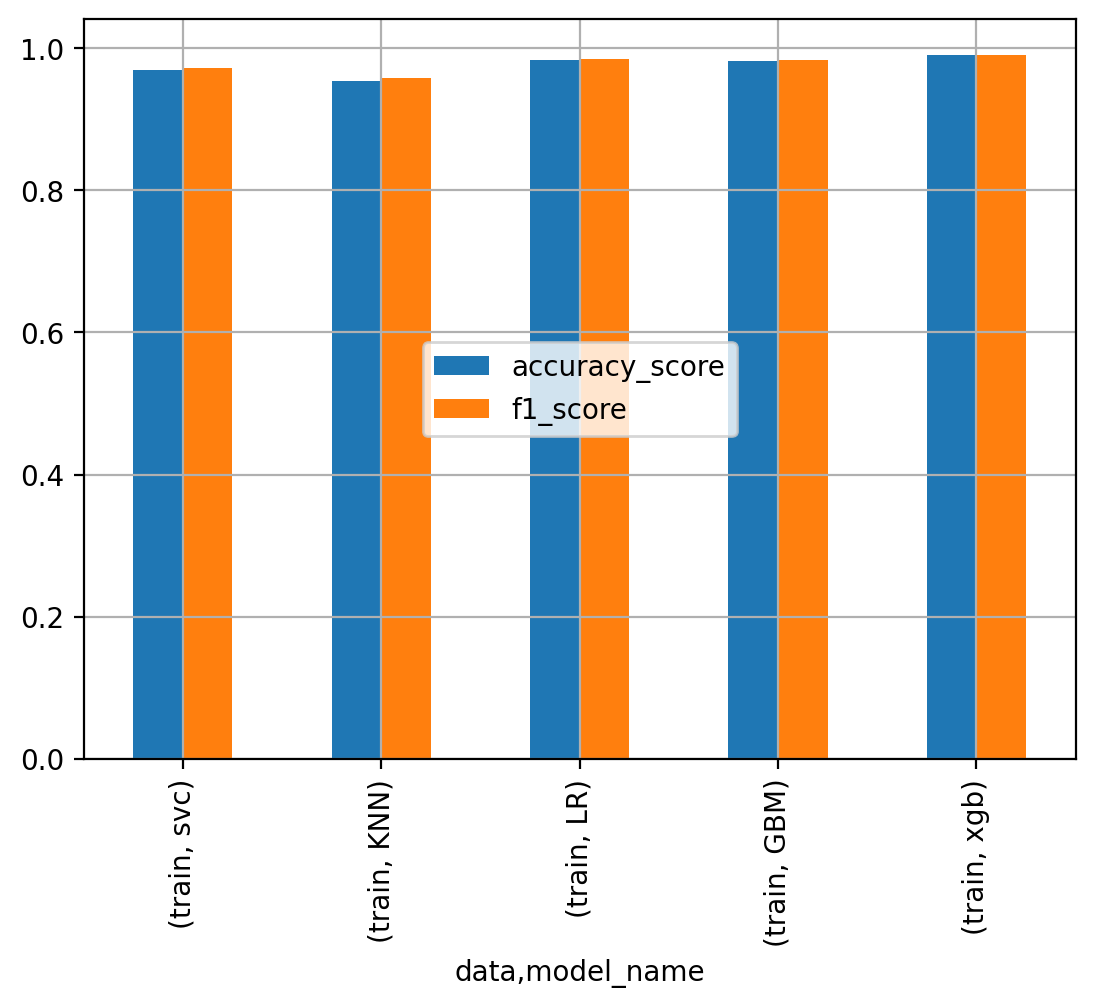

In [30]:
# pandas의 plot 함수을 사용하여 AI모델 별 accuracy_score, f1_score 수직 그래프 시각화
# grid 추가
# legend 위치 center

result_comp.plot(kind='bar')
plt.grid()
plt.legend(loc='center')
plt.show()

In [24]:
# 파라미터 선언
  # max_depth: 1~50

param = {'max_depth':range(1,51)}



XGB_model = XGBClassifier(max_depth = 5, random_state=2023)

# 학습하기
XGB_model.fit(x_train, y_map_train)

# 예측하기
XGB_pred = XGB_model.predict(x_val)

# 모델 평가 출력(accuracy_score, confusion_matrix, classification_report)

print('accuracy_score: ',accuracy_score(y_map_val,XGB_pred))
print('\n confusion_matrix: \n',confusion_matrix(y_map_val,XGB_pred))
print('\n classification_report: \n',classification_report(y_map_val,XGB_pred))

# result 데이터프레임 인덱스 0 번에 모델 데이터명('train'), 모델명('svc'), 'accuracy_score', 'f1_score' 예측 결과 할당
# 참고함수: loc[]
# f1_score의 평균은 'macro' 사용
# 정확히 구성되었나 확인

result.loc[4] = ['train', 'xgb', accuracy_score(y_map_val,XGB_pred), f1_score(y_map_val,XGB_pred,average='macro')]
result

# 중요 정보 확인
print('=' * 80)
print(model.cv_results_['mean_test_score'])
print('-' * 80)
print('최적파라미터:', model.best_params_)
print('-' * 80)
print('최고성능:', model.best_score_)
print('=' * 80)

y_pred = model.predict(x_test)

# 예측하기
# 5단계 평가하기
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

NameError: name 'model_dt' is not defined